In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import modello_QT_stoch as md

def remove_outliers(data):
    # Calculate the IQR (Interquartile Range)
    Q1 = np.percentile(data, 10)
    Q3 = np.percentile(data, 90)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

def column_min_max_normalize(matrix, min, max):#, data
    """
    Normalizes a matrix of real numbers between 1 and -1 domain using min-max normalization.
    """
    # Find the minimum and maximum values for each column
    min_vals = min
    max_vals = max
    range_vals = max_vals - min_vals
    
    # Perform column-wise min-max normalization
    normalized_matrix = 2 * (matrix - min_vals) / range_vals - 1
    
    if normalized_matrix.shape != ():
        for i in range(normalized_matrix.shape[0]):
            for ii in range(normalized_matrix.shape[1]):
                if normalized_matrix[i,ii] > 1: normalized_matrix[i,ii] = 1
                elif normalized_matrix[i,ii] <-1: normalized_matrix[i,ii] = -1

    return normalized_matrix 

def heatAct(data, min, max):

    n = 21
    #data = mu0qtp
    FILLER = -1
    def heatdn(states, thr1, thr2, h_min, h_max):
        arr = states
        df = pd.DataFrame(np.nan, index=np.arange(0,n), columns=['1', '2', '3', '4', '5','6','7','8','9','10'])
        df = df.fillna(np.nan)
        z = df.to_numpy()
        ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
        ds['p'] = ds['p'].apply(column_min_max_normalize, args=(h_min, h_max))
        h = ds.where(ds['p'] >= thr1).where(ds['p'] <= thr2).groupby(['Q','T','p']).mean().reset_index()
        a = h.to_numpy()
        for i in range(n): #mx 20
            for ii in range(10): #mx 5
                for iii in range(len(a[:])):
                    if i == a[:,0][iii] and ii == a[:,1][iii]:
                        z[int(i),int(ii)] = a[iii,3]
        return z    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(6, 7))

    # Loop through each subplot and generate a heatmap for it
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad((1,1,0.7))
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:

                ax = sns.heatmap(heatdn(data,-0.75  ,-0.5, min,  max), ax=axs[i,j], cmap=cmap)
                ax.set_title('$-1 \leq \\bar{S} \leq -0.5$')#                

            elif i == 0 and j == 1:
                ax =sns.heatmap(heatdn(data,-0.5  ,0, min,  max), ax=axs[i,j],  cmap=cmap)
                ax.set_title('$-0.5 \leq \\bar{S} \leq 0$')#
            elif i == 1 and j == 0:
                ax =sns.heatmap(heatdn(data,0  ,0.5, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0 \leq \\bar{S} \leq 0.5$')#
            else:
                ax =sns.heatmap(heatdn(data,0.5  ,0.75, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0.5 \leq \\bar{S} \leq 1$')#

    # Add a main title to the figure
    fig.suptitle('Average $v$ conditioned to Q,T,$\\bar{S}$')

    # Show the figure
    plt.show()

def heat_v(states, actions):
    arr = states
    df = pd.DataFrame(np.nan, index=np.arange(0, 21), columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    df = df.fillna(np.nan)
    z = df.to_numpy()
    ds = pd.DataFrame(arr, columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q', 'T']).mean().reset_index()
    a = h.to_numpy()

    for i in range(31):  # Maximum inventory is 20
        for ii in range(0, 11):  # Maximum time is 5
            for iii in range(len(a)):
                if i == a[iii, 0] and ii == a[iii, 1]:
                    z[int(i), int(ii)] = a[iii, 2]

    azionimu0qtp = actions
    q = np.zeros(11)
    q[0] = 20
    for i in range(1, 10):
        q[i] = q[i - 1] - azionimu0qtp[i - 1]

    
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad((1,1,0.7))
    sns.heatmap(z, cmap=cmap)
    plt.title('Average $v$ Conditioned to Q and T')
    plt.xlabel('Time')
    plt.ylabel('Inventory')
    plt.show()
    print(q)

def get_q(x, ax):
    azionimu0qtp = x.mean(0)
    q = np.zeros(11) 
    q[0] = 20
    for i in range(1, 10):
        q[i] =  q[i - 1] - azionimu0qtp[i - 1]

    azionimu0qtp = ax.mean(0)
    q0 = np.zeros(11) 
    q0[0] = 20
    for i in range(1, 10):
        q0[i] =  q0[i - 1] - azionimu0qtp[i - 1]
    STD = np.zeros(11)
    STD[10] = 0.0
    STD[0:10] = x.std(0)
    STD0 = np.zeros(11)
    STD0[10] = 0.0
    STD0[0:10] = ax.std(0)


    plt.plot(q)
    plt.plot(q0)
    plt.fill_between(np.arange(0, 11), q + STD, q - STD, alpha=0.2, color='orange')  # Fix the fill_between
    #plt.fill_between(np.arange(0, 11), q0 + STD0, q0 - STD0, alpha=0.2, color='green')  # Fix the fill_between
    #plt.axhline(0, color='r')
    plt.show()
    return q0, q, STD0, STD

def get_q_total(x, qt_x, qtp_x):
    azionimu0qtp = qt_x.mean(0)
    q = np.zeros(11) 
    q[0] = 20
    for i in range(1, 10):
        q[i] =  q[i - 1] - azionimu0qtp[i - 1]

    azionimu0qtp = qtp_x.mean(0)
    q1 = np.zeros(11) 
    q1[0] = 20
    for i in range(1, 10):
        q1[i] =  q1[i - 1] - azionimu0qtp[i - 1]

    azionimu0qtp = x.mean(0)
    q0 = np.zeros(11) 
    q0[0] = 20
    for i in range(1, 10):
        q0[i] =  q0[i - 1] - azionimu0qtp[i - 1]


    STD = np.zeros(11)
    STD[10] = 0.0
    STD[0:10] = x.std(0)
    STD0 = np.zeros(11)
    STD0[10] = 0.0
    STD0[0:10] = qt_x.std(0)
    STD1 = np.zeros(11)
    STD1[10] = 0.0
    STD1[0:10] = qtp_x.std(0)

    plt.figure(figsize=(10, 5))
    plt.plot(q, '--', label = '$RL-Q,T$')
    plt.plot(q0, '^-', label = '$B&L$')
    plt.plot(q1, '-', label = '$RL-Q,T,S$')
    plt.fill_between(np.arange(0, 11), q + STD0, q - STD0, alpha=0.2, color='orange', label = '$RL-Q,T \pm $Std. Dev.')
    plt.fill_between(np.arange(0, 11), q0 + STD, q0 - STD, alpha=0.2, color='green', label = '$B&L \pm $Std. Dev.') 
    plt.fill_between(np.arange(0, 11), q1 + STD1, q1 - STD1, alpha=0.2, color='blue', label = '$RL-Q,T,S \pm $Std. Dev.') 
    plt.ylabel('$q_t$', fontsize=15)  # Adjust fontsize here
    plt.xlabel('$t$'  , fontsize=15)  # Adjust fontsize here
    plt.title('Inventory vs. Time-steps')
    plt.xticks(fontsize=13)  # Adjust fontsize here
    plt.yticks(fontsize=13)  # Adjust fontsize here
    plt.grid(True)
    plt.legend()
    return q


$\lambda_a, \lambda_b = 1$, $\sigma_a, \sigma_b = 0.002$
===


Q,T
====


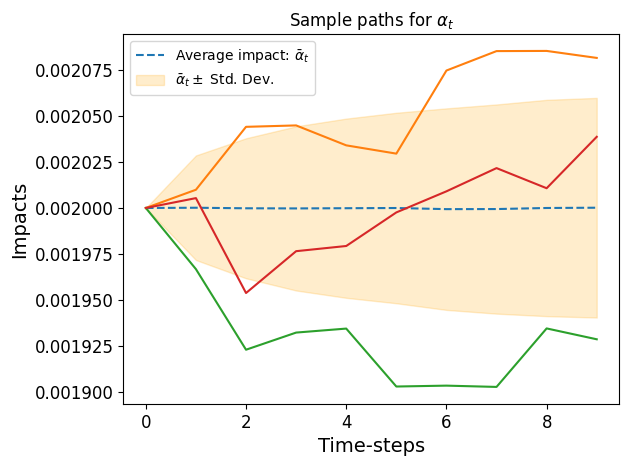

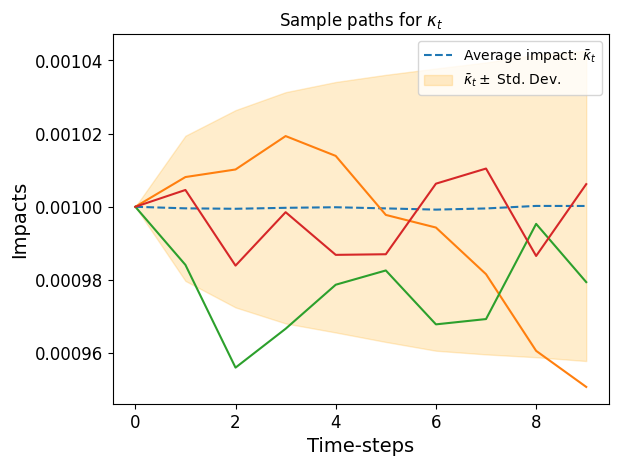

In [6]:
aL =  np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.002/alpha.npy').reshape(-1,10)
bL =  np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.002/kappa.npy').reshape(-1,10)
plt.plot(aL.reshape(-1,10).mean(0), '--', label='Average impact: $\\bar{\\alpha}_t$')
plt.fill_between(np.arange(0, 10), aL.reshape(-1,10).mean(0) + aL.reshape(-1,10).std(0), aL.reshape(-1,10).mean(0) - aL.reshape(-1,10).std(0), alpha=0.2, color='orange', label = '$\\bar{\\alpha}_t \pm$ Std. Dev.')  # Fix the fill_between
plt.plot(aL.reshape(-1,10)[0])
plt.plot(aL.reshape(-1,10)[2500])
plt.plot(aL.reshape(-1,10)[5_000-1])
plt.title('Sample paths for $\\alpha_t$')
plt.xlabel('Time-steps', fontsize=14)
plt.ylabel('Impacts', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.plot(bL.reshape(-1,10).mean(0), '--', label='Average impact: $\\bar{\\kappa}_t$')
plt.fill_between(np.arange(0, 10), bL.reshape(-1,10).mean(0) + bL.reshape(-1,10).std(0), bL.reshape(-1,10).mean(0) - bL.reshape(-1,10).std(0), alpha=0.2, color='orange', label = '$\\bar{\\kappa}_t \pm$ Std. Dev.')
plt.plot(bL.reshape(-1,10)[0])
plt.plot(bL.reshape(-1,10)[2500])
plt.plot(bL.reshape(-1,10)[5_000-1])
plt.title('Sample paths for $\kappa_t$')
plt.title('Sample paths for $\\kappa_t$')
plt.xlabel('Time-steps', fontsize=14)
plt.ylabel('Impacts', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [3]:
TEMP_IMP = 0.002
PERM_IMP = 0.001

def abm(T=1, seed = 14, numIt=1, k_0 = PERM_IMP, a_0 = TEMP_IMP, s0=10, action=0.0, sigma=0.00001):
    '''
    returns a matrix of Arithmetic Brownian Motion paths
    '''
    N = T
    I = numIt
    dt= 1.0 / N
    X = np.zeros((N + 1, I), dtype=float)
    X[0] = s0
    lambda_a = 1
    lambda_b = 1
    theta_b = PERM_IMP
    theta_a = TEMP_IMP
    sigma_b = 0.002 
    sigma_a = 0.002 
    N = T
    I = numIt
    dt = 1.0 / N
    X = np.zeros((N, I), dtype=float)
    k = np.zeros((N, I), dtype=float)
    a = np.zeros((N, I), dtype=float)
    a[0] = a_0
    k[0] = k_0
    X[0] = s0
    # Generate correlated standard normal draws
    corr_matrix = np.array([[1.0, 0.9], [0.9, 1.0]])  # Define the correlation matrix
    L = np.linalg.cholesky(corr_matrix)  # Perform Cholesky decomposition
    rand_nums = np.random.standard_normal((2, I))  # Generate standard normal draws for each iteration
    rand_nums_corr = np.matmul(L, rand_nums)  # Apply Cholesky decomposition
    for i in range(N):
        k[i] = k[i-1] + (lambda_b * (theta_b - k[i-1])) * dt + sigma_b * np.sqrt(k[i-1]) * np.sqrt(dt) * rand_nums_corr[0, :]
        a[i] = a[i-1] + (lambda_a * (theta_a - a[i-1])) * dt + sigma_a * np.sqrt(a[i-1]) * np.sqrt(dt) * rand_nums_corr[1, :]
        k_i = k[i]
        a_i = a[i]
        # Generate new correlated standard normal draws for the next time step
        rand_nums = np.random.standard_normal((2, I))
        rand_nums_corr = np.matmul(L, rand_nums)
    for i in range(N):
        X[i] = X[i-1] + (0 - (k_i * action)) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I) 
    return np.abs(X), a_i, k_i
T = 10

import numpy as np

x = []
PERM_IMP = 0.001
TEMP_IMP = 0.002
numIt = 5_000
lambda_a = 1
lambda_b = 1
theta_b = PERM_IMP
theta_a = TEMP_IMP
ai = []
ki=[]
dat = [] 
for j in range(numIt):
    q_t = 20
    s0 = 10
    v_t = 0
    a = TEMP_IMP
    k = PERM_IMP
    for t in range(T):
        v_t = (1 / (T - t) + (lambda_a * (theta_a - a)) / (2 * a) + (T - t) * (lambda_b * (theta_b - k)) / (6 * k)) * q_t
        q_t -= v_t

        x.append(v_t)
        dati, a, k = abm(numIt = 1, a_0=a, k_0=k, action=v_t, s0=s0) # 
        a = a[0]
        k = k[0]
        ai.append(a)
        ki.append(k)
        s0 = dati[-1]
        dat.append(dati)
       
x = np.asarray(x).reshape(-1,10)
aL = np.asarray(ai).reshape(-1,10)
d = np.asarray(dat)
at = []
for i in range(d[:,0].reshape(-1,10).shape[0]):
    at.append(sum(d[:,0].reshape(-1,10)[i]* x.reshape(-1,10)[i] - aL.reshape(-1,10)[i] * x.reshape(-1,10)[i]**2))  
at = (np.asarray(at))
200-(at).mean(), (at).std()

(0.31293719815613485, 0.6374212665678368)

In [4]:
sign = (np.sign(x.reshape(-1,10))<0).flatten()
counter = 0
for i in range(len(sign)):
    if sign[i] == True: counter += 1
print(counter/len(sign))
print(counter)

0.03056
1528


media dPeL= 0.00018298283244931138 std rl= 0.0031913001344979794 is= 0.2789318791689368 std is= 0.01191414910756583


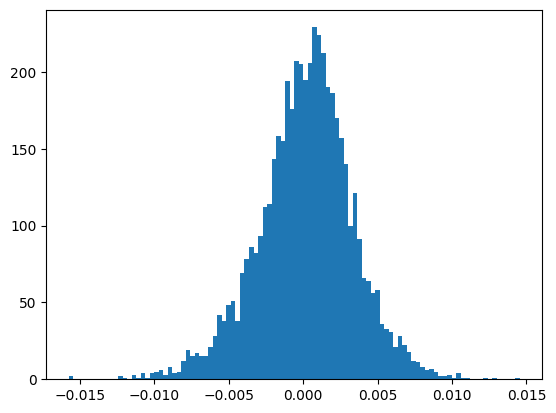

In [5]:
PASSI = 10
def impl_IS():
    azioni = np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.002/azioni.npy')
    dati =   np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.002/dati.npy')
    alpha =  np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.002/alpha.npy')
    a = []
    for i in range(dati[:,0].reshape(-1,PASSI).shape[0]):
        a.append(sum(dati[:,0].reshape(-1,PASSI)[i]* azioni.reshape(-1,PASSI)[i] 
                        -alpha.reshape(-1,PASSI)[i]* azioni.reshape(-1,PASSI)[i]**2) )
    return np.asarray(a)

is_bl = impl_IS()
is_bl = (is_bl)
data = (is_bl-at)/at
print('media dPeL=',np.mean(remove_outliers(data)), 'std rl=',np.std((data)), 'is=',200-np.mean(remove_outliers(is_bl)), 'std is=',np.std((is_bl)))
plt.hist(((data)), bins = 100);

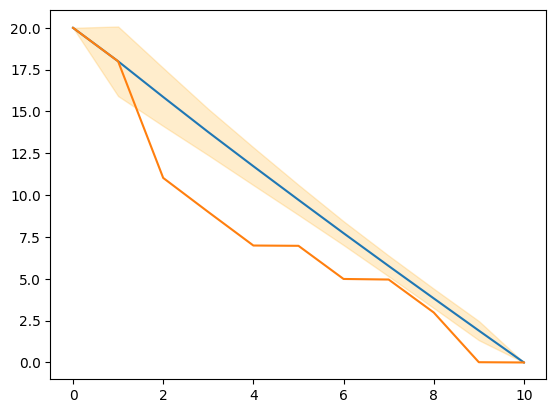

(array([2.00000e+01, 1.79976e+01, 1.10290e+01, 8.99320e+00, 6.98940e+00,
        6.97200e+00, 4.99080e+00, 4.95700e+00, 2.98720e+00, 1.58000e-02,
        0.00000e+00]),
 array([20.        , 18.        , 15.866369  , 13.76848075, 11.72777188,
         9.71735816,  7.72713021,  5.76687649,  3.83036767,  1.90518328,
         0.        ]),
 array([0.12326492, 0.50320378, 0.60109763, 0.41156477, 0.24879156,
        0.24340616, 0.25895475, 0.22646845, 0.2679217 , 0.17986206,
        0.        ]),
 array([0.        , 2.07975655, 1.73470032, 1.38121871, 1.13000742,
        0.89877685, 0.7127369 , 0.62023877, 0.57889309, 0.57344507,
        0.        ]))

In [6]:
azioni = np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.002/azioni.npy')
get_q(x, azioni.reshape(-1,10))

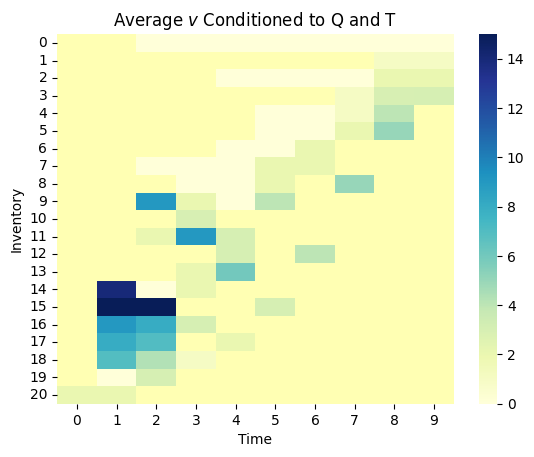

[20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.]


In [7]:

mu0 = np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.002/STATI.npy')
data =np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.002/dati.npy')
 
mu0[:,1] = mu0[:,1] - 1
v_t = np.zeros(10)
heat_v(mu0, v_t)

Q,T,P
====

media dPeL= 0.0002563433098103762 std dPeL= 0.003270130469360566 is= 0.25729152213085626 std is= 0.007117562749361984


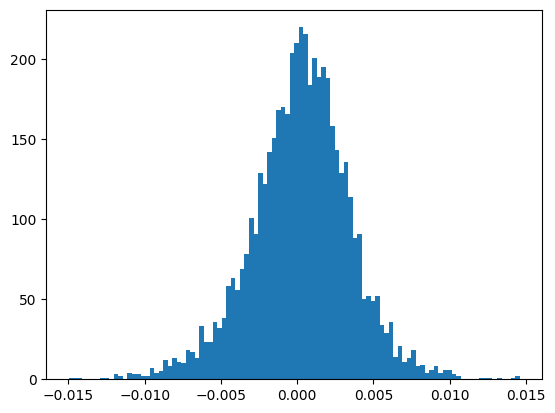

In [16]:
PASSI = 10
def impl_IS():
    azioni = np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.002/azioni.npy')
    dati =   np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.002/dati.npy')
    alpha =  np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.002/alpha.npy')
    a = []
    for i in range(dati[:,0].reshape(-1,PASSI).shape[0]):
        a.append(sum(dati[:,0].reshape(-1,PASSI)[i]* azioni.reshape(-1,PASSI)[i] 
                        -alpha.reshape(-1,PASSI)[i]* azioni.reshape(-1,PASSI)[i]**2) )
    return np.asarray(a)

is_bl = impl_IS()
is_bl = (is_bl)
data =(is_bl-at)/at
print('media dPeL=',np.mean(remove_outliers(data)), 'std dPeL=',np.std((data)), 'is=',200-np.mean(remove_outliers(is_bl)), 'std is=',np.std((is_bl)))
plt.hist((remove_outliers(data)), bins = 100);

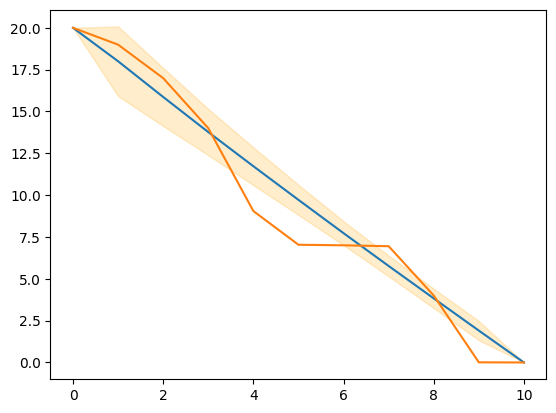

(array([2.00000e+01, 1.89942e+01, 1.69914e+01, 1.39994e+01, 9.04900e+00,
        7.03440e+00, 7.00200e+00, 6.94800e+00, 3.99980e+00, 9.80000e-03,
        0.00000e+00]),
 array([20.        , 18.        , 15.866369  , 13.76848075, 11.72777188,
         9.71735816,  7.72713021,  5.76687649,  3.83036767,  1.90518328,
         0.        ]),
 array([0.11902252, 0.31998775, 0.17531686, 0.43259663, 0.21444542,
        0.28661863, 0.4873233 , 0.3902778 , 0.28548205, 0.14458202,
        0.        ]),
 array([0.        , 2.07975655, 1.73470032, 1.38121871, 1.13000742,
        0.89877685, 0.7127369 , 0.62023877, 0.57889309, 0.57344507,
        0.        ]))

In [9]:
ax =   np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.002/azioni.npy').reshape(-1,10)
get_q(x, ax)

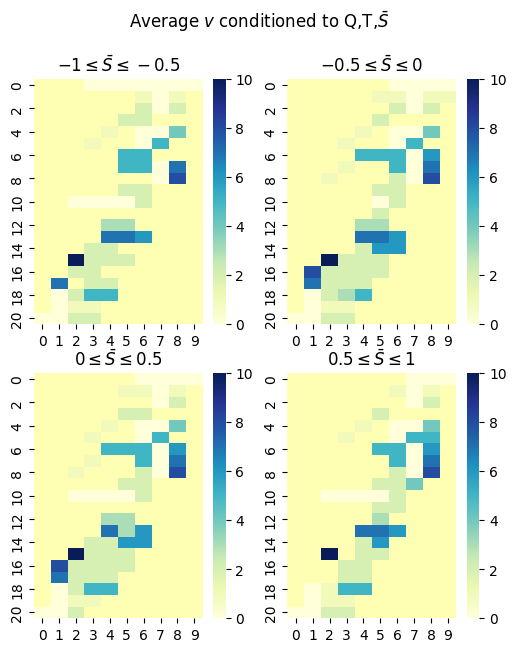

In [10]:
mu0 = np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.002/perAz/stati.npy')
data =np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.002/perAz/dati.npy')
 
v_t = np.zeros(10)
heatAct(mu0, data.max(), data.min())

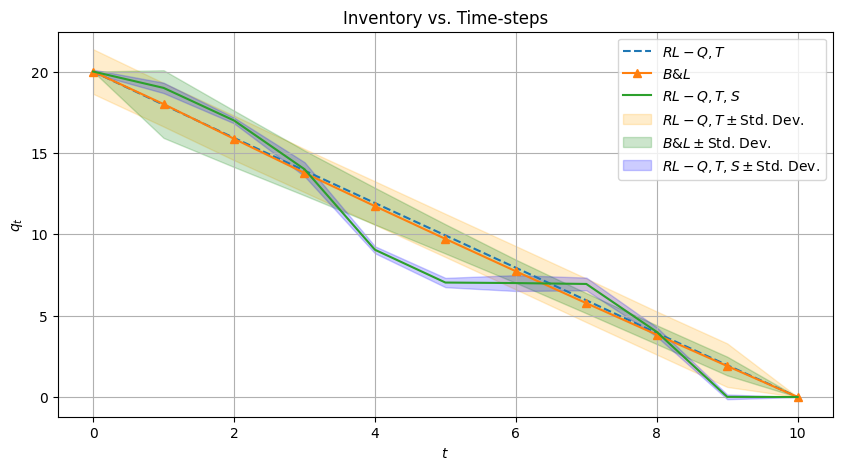

array([20.    , 17.9572, 15.9212, 13.916 , 11.92  ,  9.9314,  7.9428,
        5.9418,  3.932 ,  1.9564,  0.    ])

In [11]:
qtp_x = np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.002/azioni.npy').reshape(-1,10)
qt_x  = np.load('C:/Users/macri/Desktop/ennesima/azioni.npy').reshape(-1,10)
get_q_total(x, qt_x, qtp_x)

$\lambda_a, \lambda_b = 1$, $\sigma_a, \sigma_b = 0.005$
===

Q,T
====


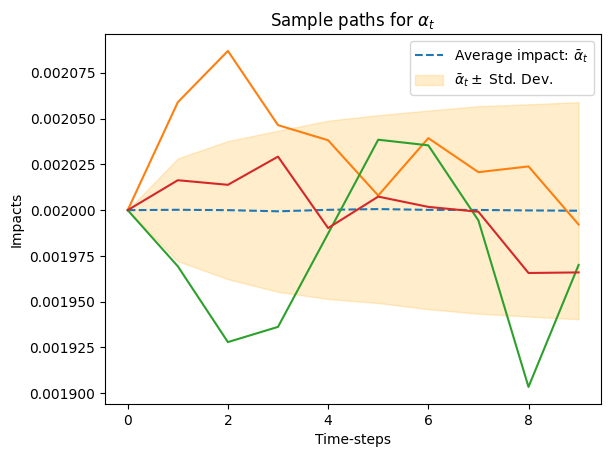

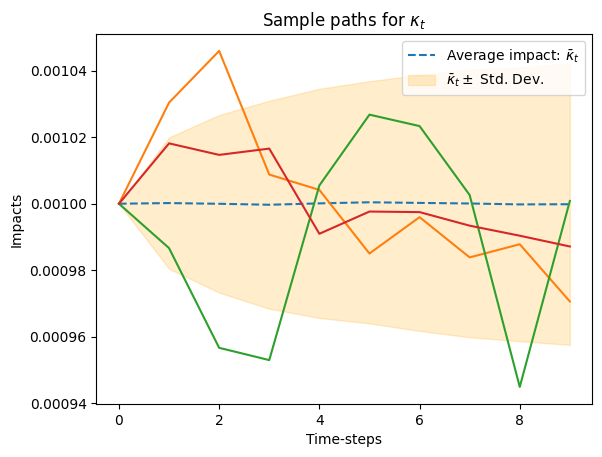

In [12]:
aL =  np.load('C:/Users/macri/Desktop/ennesima/alpha.npy').reshape(-1,10)
bL =  np.load('C:/Users/macri/Desktop/ennesima/kappa.npy').reshape(-1,10)
plt.plot(aL.reshape(-1,10).mean(0), '--', label='Average impact: $\\bar{\\alpha}_t$')
plt.fill_between(np.arange(0, 10), aL.reshape(-1,10).mean(0) + aL.reshape(-1,10).std(0), aL.reshape(-1,10).mean(0) - aL.reshape(-1,10).std(0), alpha=0.2, color='orange', label = '$\\bar{\\alpha}_t \pm$ Std. Dev.')  # Fix the fill_between
plt.plot(aL.reshape(-1,10)[0])
plt.plot(aL.reshape(-1,10)[2500])
plt.plot(aL.reshape(-1,10)[5_000-1])
plt.title('Sample paths for $\\alpha_t$')
plt.xlabel('Time-steps')
plt.ylabel('Impacts')
plt.legend()
plt.show()
plt.plot(bL.reshape(-1,10).mean(0), '--', label='Average impact: $\\bar{\\kappa}_t$')
plt.fill_between(np.arange(0, 10), bL.reshape(-1,10).mean(0) + bL.reshape(-1,10).std(0), bL.reshape(-1,10).mean(0) - bL.reshape(-1,10).std(0), alpha=0.2, color='orange', label = '$\\bar{\\kappa}_t \pm$ Std. Dev.')
plt.plot(bL.reshape(-1,10)[0])
plt.plot(bL.reshape(-1,10)[2500])
plt.plot(bL.reshape(-1,10)[5_000-1])
plt.title('Sample paths for $\kappa_t$')
plt.title('Sample paths for $\\kappa_t$')
plt.xlabel('Time-steps')
plt.ylabel('Impacts')
plt.legend()
plt.show()

In [13]:
def abm(T=1, seed = 14, numIt=1, k_0 = PERM_IMP, a_0 = TEMP_IMP, s0=10, action=0.0, sigma=0.00001):
    '''
    returns a matrix of Arithmetic Brownian Motion paths
    '''
    N = T
    I = numIt
    dt= 1.0 / N
    X = np.zeros((N + 1, I), dtype=float)
    X[0] = s0
    lambda_a = 1
    lambda_b = 1
    theta_b = PERM_IMP
    theta_a = TEMP_IMP
    sigma_b = 0.002 
    sigma_a = 0.002 
    N = T
    I = numIt
    dt = 1.0 / N
    X = np.zeros((N, I), dtype=float)
    k = np.zeros((N, I), dtype=float)
    a = np.zeros((N, I), dtype=float)
    a[0] = a_0
    k[0] = k_0
    X[0] = s0
    # Generate correlated standard normal draws
    corr_matrix = np.array([[1.0, 0.9], [0.9, 1.0]])  # Define the correlation matrix
    L = np.linalg.cholesky(corr_matrix)  # Perform Cholesky decomposition
    rand_nums = np.random.standard_normal((2, I))  # Generate standard normal draws for each iteration
    rand_nums_corr = np.matmul(L, rand_nums)  # Apply Cholesky decomposition
    for i in range(N):
        k[i] = k[i-1] + (lambda_b * (theta_b - k[i-1])) * dt + sigma_b * np.sqrt(k[i-1]) * np.sqrt(dt) * rand_nums_corr[0, :]
        a[i] = a[i-1] + (lambda_a * (theta_a - a[i-1])) * dt + sigma_a * np.sqrt(a[i-1]) * np.sqrt(dt) * rand_nums_corr[1, :]
        k_i = k[i]
        a_i = a[i]
        # Generate new correlated standard normal draws for the next time step
        rand_nums = np.random.standard_normal((2, I))
        rand_nums_corr = np.matmul(L, rand_nums)
    for i in range(N):
        X[i] = X[i-1] + (0 - (k_i * action)) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I) 
    return np.abs(X), a_i, k_i
T = 10

import numpy as np

x = []
PERM_IMP = 0.001
TEMP_IMP = 0.002
numIt = 5_000
lambda_a = 1
lambda_b = 1
theta_b = PERM_IMP
theta_a = TEMP_IMP
ai = []
ki=[]
dat = [] 
for j in range(numIt):
    q_t = 20
    s0 = 10
    v_t = 0
    a = TEMP_IMP
    k = PERM_IMP
    for t in range(T):
        v_t = (1 / (T - t) + (lambda_a * (theta_a - a)) / (2 * a) + (T - t) * (lambda_b * (theta_b - k)) / (6 * k)) * q_t
        q_t -= v_t

        x.append(v_t)
        dati, a, k = abm(numIt = 1, a_0=a, k_0=k, action=v_t, s0=s0) # 
        a = a[0]
        k = k[0]
        ai.append(a)
        ki.append(k)
        s0 = dati[-1]
        dat.append(dati)
       
x = np.asarray(x).reshape(-1,10)
aL = np.asarray(ai).reshape(-1,10)
d = np.asarray(dat)
at = []
for i in range(d[:,0].reshape(-1,10).shape[0]):
    at.append(sum(d[:,0].reshape(-1,10)[i]* x.reshape(-1,10)[i] - aL.reshape(-1,10)[i] * x.reshape(-1,10)[i]**2))  
at = (np.asarray(at))
200-remove_outliers(at).mean(), (at).std()

(0.30651439912901424, 0.6532084747973392)

In [14]:
PASSI = 10
def impl_IS():
    azioni = np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.005/azioni.npy')[:5000]
    dati =   np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.005/dati.npy')[:5000]
    alpha =  np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.005/alpha.npy')[:5000]
    a = []
    for i in range(dati[:,0].reshape(-1,PASSI).shape[0]):
        a.append(sum(dati[:,0].reshape(-1,PASSI)[i]* azioni.reshape(-1,PASSI)[i] 
                        -0.002* azioni.reshape(-1,PASSI)[i]**2) )
    return np.asarray(a)

is_bl = impl_IS()
is_bl = (is_bl)
data = (is_bl-at)/at
print('media dPeL=',np.mean(remove_outliers(data)), 'std rl=',np.std((data)), 'is=',200-np.mean(remove_outliers(is_bl)), 'std is=',np.std((is_bl)))
plt.hist(((data)), bins = 100);

ValueError: operands could not be broadcast together with shapes (500,) (5000,) 

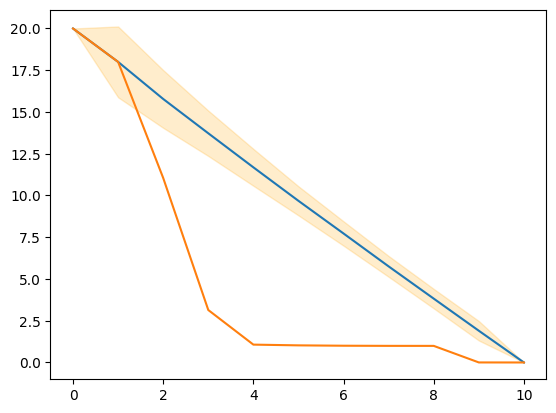

(array([2.00000e+01, 1.79988e+01, 1.10486e+01, 3.14140e+00, 1.06900e+00,
        1.02500e+00, 1.00340e+00, 9.95000e-01, 9.93600e-01, 2.20000e-03,
        0.00000e+00]),
 array([20.        , 18.        , 15.77955944, 13.72446491, 11.68560482,
         9.67857581,  7.72289697,  5.75275976,  3.82289465,  1.89958763,
         0.        ]),
 array([0.11488499, 0.53077298, 0.75986062, 0.73726402, 0.39857747,
        0.23565534, 0.14258135, 0.03739037, 0.16651138, 0.04685253,
        0.        ]),
 array([0.        , 2.12103949, 1.72760474, 1.35811866, 1.10378672,
        0.87051084, 0.72879243, 0.62221433, 0.58235878, 0.58291648,
        0.        ]))

In [ ]:
ax =   np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.005/azioni.npy').reshape(-1,10)

get_q(x, ax)

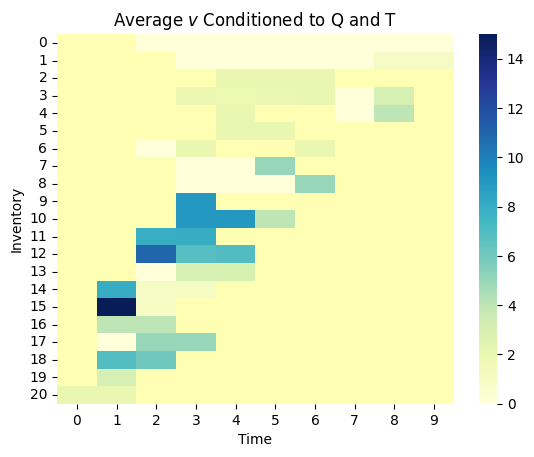

[20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  0.]


In [ ]:
mu0 = np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.005/STATI.npy')
data =np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.005/dati.npy')
 
mu0[:,1] = mu0[:,1] - 1
v_t = np.zeros(10)
heat_v(mu0, v_t)

Q,T,P
====


media dPeL= 3.867653173931855e-05 std dPeL= 0.003225964697471439 is= 0.2820131277209157 std is= 0.017187265175999892


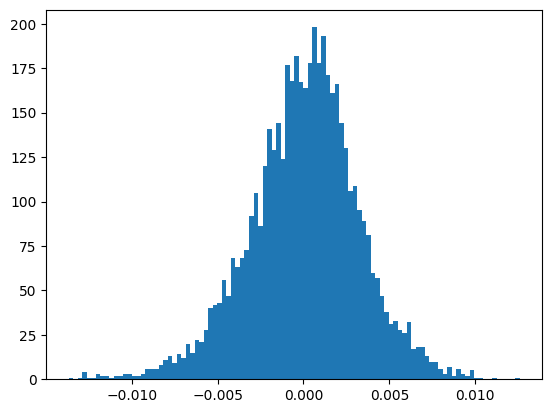

In [ ]:
PASSI = 10
def impl_IS():
    azioni = np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.005/azioni.npy')
    dati =   np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.005/dati.npy')
    alpha =  np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.005/alpha.npy')
    a = []
    for i in range(dati[:,0].reshape(-1,PASSI).shape[0]):
        a.append(sum(dati[:,0].reshape(-1,PASSI)[i]* azioni.reshape(-1,PASSI)[i] 
                        -alpha.reshape(-1,PASSI)[i]* azioni.reshape(-1,PASSI)[i]**2) )
    return np.asarray(a)

is_bl = impl_IS()
is_bl = (is_bl)
data =(is_bl-at)/at
print('media dPeL=',np.mean(remove_outliers(data)), 'std dPeL=',np.std((data)), 'is=',200-np.mean(remove_outliers(is_bl)), 'std is=',np.std((is_bl)))
plt.hist((remove_outliers(data)), bins = 100);

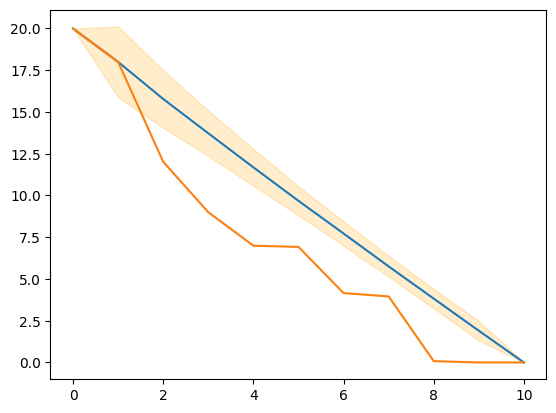

(array([2.00000e+01, 1.79982e+01, 1.20188e+01, 8.99800e+00, 6.99300e+00,
        6.92040e+00, 4.15480e+00, 3.95460e+00, 7.92000e-02, 4.00000e-04,
        0.00000e+00]),
 array([20.        , 18.        , 15.77955944, 13.72446491, 11.68560482,
         9.67857581,  7.72289697,  5.75275976,  3.82289465,  1.89958763,
         0.        ]),
 array([0.12408368, 0.35857446, 0.47704021, 0.47347122, 0.59070233,
        0.79815828, 1.05115173, 0.93694975, 0.34378854, 0.019996  ,
        0.        ]),
 array([0.        , 2.12103949, 1.72760474, 1.35811866, 1.10378672,
        0.87051084, 0.72879243, 0.62221433, 0.58235878, 0.58291648,
        0.        ]))

In [ ]:
ax =   np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.005/azioni.npy').reshape(-1,10)
get_q(x, ax)

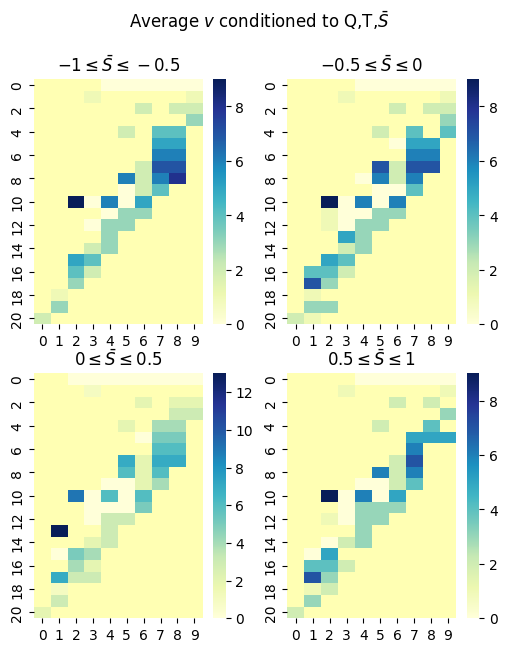

In [ ]:
mu0 = np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.005/perAz/stati.npy')
data =np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.005/perAz/dati.npy')
 
v_t = np.zeros(10)
heatAct(mu0, data.max(), data.min())

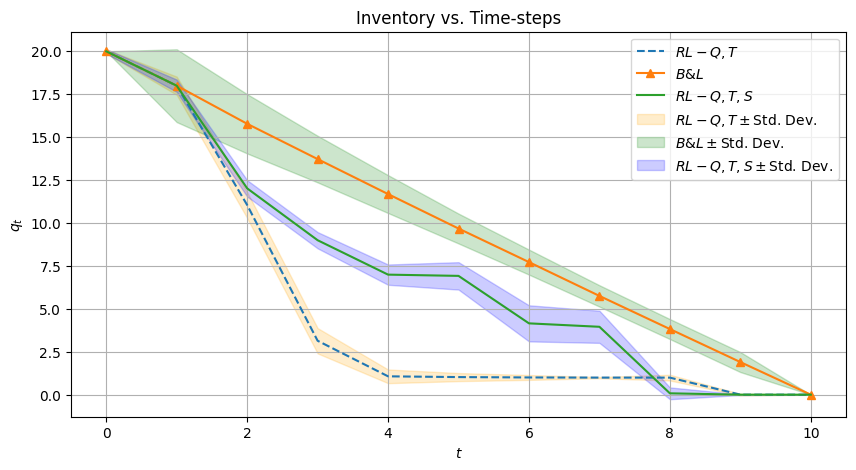

array([2.00000e+01, 1.79988e+01, 1.10486e+01, 3.14140e+00, 1.06900e+00,
       1.02500e+00, 1.00340e+00, 9.95000e-01, 9.93600e-01, 2.20000e-03,
       0.00000e+00])

In [ ]:
qtp_x = np.load('C:/Users/macri/Desktop/ennesima/buona_qtp_s_b0.005/azioni.npy').reshape(-1,10)
qt_x  = np.load('C:/Users/macri/Desktop/ennesima/buona_qt_s_b0.005/azioni.npy').reshape(-1,10)
get_q_total(x, qt_x, qtp_x)